In [1]:
import numpy as np
import random
#import itertools
import scipy.misc

import matplotlib
#matplotlib.use('qt5agg')
import matplotlib.pyplot as plt

#%matplotlib notebook
%matplotlib qt 
#%matplotlib inline 
import time

# gridworldclass that we made
from gridworldclass import gameEnv
from Agents import SRTD_agent, TDagent

plt.close('all')

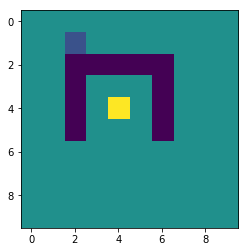

In [2]:
# make game environment
wall_x = np.array([2,2,2,2,3,4,5,6,6,6,6])
wall_y = np.array([5,4,3,2,2,2,2,2,3,4,5])
wall_loc = np.array([wall_y, wall_x]).T

nrows = 10 # number of rows in grid (0 to n-1)
ncols = 10 # number of cols in grid (0 to n-1)
reward_loc = np.array([[4,4]]) # reward location - give one row for each reward
reward_mag = np.array([2]) # reward mag - give one value for each reward
start_pos = np.array([1,2]) # starting position of agent on each episode (row,col)
env = gameEnv(nrows,ncols,reward_loc, reward_mag,wall_loc, start_pos) # make game environment
f,(ax1) = plt.subplots(1) # plot environment
env.render(ax1)

In [42]:
plt.close("all")
# make policy matrix -  contains p(action col| in state row)
nstates = env.nrows*env.ncols
pol_mtx = .25*np.ones([nstates,4])
    
# make Tstate-state
Tss = env.make_Tss(pol_mtx)

path = '/Users/evanrussek/codeprojects/gridRL/res_fold'

gamma_list = np.arange(0,1.05,.05)
for i in range(len(gamma_list)):
    gamma = gamma_list[i]
    if gamma > 0.99:
        gamma = .999999999999
        
    name = path + '/SR_gamma' + str(gamma) + '.csv'
    print(name)
    M = env.make_SR(Tss,gamma)
    env.make_csv(M, name)
    f,(ax1) = plt.subplots(1)
    env.render_mtx(M,ax1)

# print both to csv
env.make_csv(Tss,path + '/T_rand.csv')
env.make_csv(M, "M_rand.csv")

# make some plots
f,(ax1, ax2, ax3, ax4) = plt.subplots(4)
env.render_mtx(Tss,ax1)
env.render_mtx_row(Tss,env.start_state,ax2)
    
env.render_mtx(M,ax3)
env.render_mtx_row(M,env.start_state,ax4)
    


/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.0.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.05.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.1.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.15.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.2.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.25.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.3.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.35.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.4.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.45.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.5.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.55.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.6.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.65.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/SR_gamma0.7.csv
/Users/evanrussek/codeprojects/gridRL/res_fold/S

/Users/evanrussek/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [38]:
env.make_SR(Tss,.9999999)

array([[ 112366.77847863,  112364.83345586,  112363.68171628, ...,
         112358.05579759,  112358.02934755,  112358.01769067],
       [ 112364.83345586,  112365.71554674,  112364.21802692, ...,
         112358.05578754,  112358.03991449,  112358.03372392],
       [ 112363.68171628,  112364.21802692,  112365.49303257, ...,
         112358.06166748,  112358.06695115,  112358.07169488],
       ..., 
       [ 112358.05579759,  112358.05578754,  112358.06166748, ...,
         112363.17035151,  112362.12728221,  112361.7292408 ],
       [ 112358.02934755,  112358.03991449,  112358.06695115, ...,
         112362.12728221,  112363.7192438 ,  112362.90903079],
       [ 112358.01769067,  112358.03372392,  112358.07169488, ...,
         112361.7292408 ,  112362.90903079,  112364.89289054]])

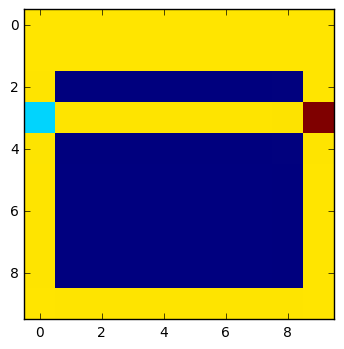

In [142]:
# detour task environment
x1 = np.arange(1,9)
y1 = 4*np.ones(x1.shape)

x2 = np.arange(1,9)
y2 = 2*np.ones(x3.shape)

x3 = np.arange(1,9)
y3 = 8*np.ones(x3.shape)

x4 = np.arange(1,9)
y4 = 7*np.ones(x3.shape)

x5 = np.arange(1,9)
y5 = 6*np.ones(x3.shape)

x6 = np.arange(1,9)
y6 = 5*np.ones(x3.shape)

x7 = np.arange(1,9)
y7 = 4*np.ones(x3.shape)

wall_x = np.concatenate([x1, x2,x3,x4, x5, x6, x7]);
wall_y = np.concatenate([y1, y2,y3, y4 , y5, y6, y7]);

wall_loc = np.array([wall_y, wall_x]).T

nrows = 10 # number of rows in grid (0 to n-1)
ncols = 10 # number of cols in grid (0 to n-1)
reward_loc = np.array([[3,9]]) # reward location - give one row for each reward
reward_mag = np.array([1]) # reward mag - give one value for each reward
start_pos = np.array([3,0]) # starting position of agent on each episode (row,col)
env2 = gameEnv(nrows,ncols,reward_loc, reward_mag,wall_loc, start_pos) # make game env

f,(ax1) = plt.subplots(1) # plot environment
env2.render(ax1)

In [15]:
gamma_list = np.arange(0,1.05,.05)

In [16]:
gamma_list

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])